In [15]:
# this version allows us to modify look-forward period. Load everything, use all variables, but look forward more time steps.
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('df PS and weather.csv', index_col = 0, parse_dates=True)

In [16]:
df.head(15)

,num_pazienti_in_attesa_totale_colori,num_pazienti24ore_totale_colori,num_pazienti24ore_bianchi,num_pazienti24ore_verdi,num_pazienti24ore_gialli,num_pazienti24ore_rossi,num_pazienti_giorno_totale_colori,num_pazienti_giorno_bianchi,num_pazienti_giorno_verdi,num_pazienti_giorno_gialli,...,solarenergy,uvindex,severerisk,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",rain
2022-02-11 00:00:00,6.40,111.80,0.0,72.8,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 00:15:00,4.00,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 00:30:00,2.80,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 00:45:00,2.00,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 01:00:00,2.75,111.75,0.0,72.0,34.75,5.0,1.75,0.0,0.0,1.75,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 01:15:00,3.60,112.60,0.0,72.0,34.60,6.0,2.60,0.0,0.0,1.60,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 01:30:00,3.60,113.00,0.0,72.0,35.00,6.0,3.00,0.0,0.0,2.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 01:45:00,2.00,113.00,0.0,72.0,35.00,6.0,3.00,0.0,0.0,2.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 02:00:00,2.80,113.80,0.0,72.8,35.00,6.0,3.80,0.0,0.8,2.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 02:15:00,2.40,114.40,0.0,73.2,35.20,6.0,4.40,0.0,1.2,2.20,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# set up routine to predict ahead some time period
look_forward = 10   #time to predict is look_forward*15 min 

y = df.iloc[:,0].shift(periods=look_forward)
df = df.drop(df.columns[[0]], axis=1) 
df = pd.concat([y, df], axis=1)
df.head(15)


,num_pazienti_in_attesa_totale_colori,num_pazienti24ore_totale_colori,num_pazienti24ore_bianchi,num_pazienti24ore_verdi,num_pazienti24ore_gialli,num_pazienti24ore_rossi,num_pazienti_giorno_totale_colori,num_pazienti_giorno_bianchi,num_pazienti_giorno_verdi,num_pazienti_giorno_gialli,...,solarenergy,uvindex,severerisk,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",rain
2022-02-11 00:00:00,NaN,111.80,0.0,72.8,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 00:15:00,NaN,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 00:30:00,NaN,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 00:45:00,NaN,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 01:00:00,NaN,111.75,0.0,72.0,34.75,5.0,1.75,0.0,0.0,1.75,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 01:15:00,NaN,112.60,0.0,72.0,34.60,6.0,2.60,0.0,0.0,1.60,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 01:30:00,NaN,113.00,0.0,72.0,35.00,6.0,3.00,0.0,0.0,2.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 01:45:00,NaN,113.00,0.0,72.0,35.00,6.0,3.00,0.0,0.0,2.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 02:00:00,NaN,113.80,0.0,72.8,35.00,6.0,3.80,0.0,0.8,2.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-02-11 02:15:00,NaN,114.40,0.0,73.2,35.20,6.0,4.40,0.0,1.2,2.20,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#clean up the dataframe by dropping the first and last look_forward number of rows

df = df[look_forward:-look_forward]
df.tail()

,num_pazienti_in_attesa_totale_colori,num_pazienti24ore_totale_colori,num_pazienti24ore_bianchi,num_pazienti24ore_verdi,num_pazienti24ore_gialli,num_pazienti24ore_rossi,num_pazienti_giorno_totale_colori,num_pazienti_giorno_bianchi,num_pazienti_giorno_verdi,num_pazienti_giorno_gialli,...,solarenergy,uvindex,severerisk,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",rain
2023-04-01 17:00:00,14.4,113.2,0.0,78.2,28.0,7.0,85.0,0.0,59.0,22.0,...,0.600,2.00,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2023-04-01 17:15:00,12.8,112.6,0.0,77.2,28.0,7.4,86.4,0.0,60.0,22.0,...,0.575,1.75,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2023-04-01 17:30:00,13.4,113.8,0.0,77.0,28.0,8.4,87.8,0.0,60.0,22.0,...,0.550,1.50,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2023-04-01 17:45:00,13.6,115.0,0.0,78.2,28.2,8.6,90.2,0.0,61.2,22.8,...,0.525,1.25,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2023-04-01 18:00:00,12.0,115.2,0.0,78.0,28.2,9.0,92.2,0.0,62.0,23.2,...,0.500,1.00,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


From this point on it's the same as before, but we can now optimize a lot more.

In [20]:
# make variable x = all columns of df except first column  
X = df.iloc[:, 1:] #everything except first column
y = df.iloc[:, 0:1] #select response variable

y.head()
# X.shape

,num_pazienti_in_attesa_totale_colori
2022-02-11 05:00:00,2.2
2022-02-11 05:15:00,0.6
2022-02-11 05:30:00,0.0
2022-02-11 05:45:00,0.0
2022-02-11 06:00:00,0.0


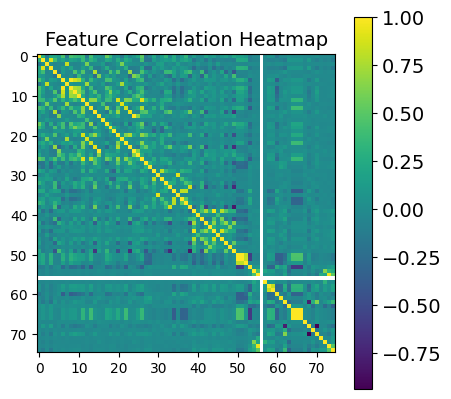

In [21]:
def show_heatmap(data):
    plt.matshow(data.corr())
    # plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    # plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

show_heatmap(df) 

In [22]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

#first 30000 for training

X_train = X_ss[:35000, :]
X_test = X_ss[35000:, :]

y_train = y_mm[:35000, :]
y_test = y_mm[35000:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (35000, 74) (35000, 1)
Testing Shape (4797, 74) (4797, 1)


In [23]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([35000, 1, 74]) torch.Size([35000, 1])
Testing Shape torch.Size([4797, 1, 74]) torch.Size([4797, 1])


In [24]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [29]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.01 #0.001 lr

input_size = X_train.shape[1] #number of features
hidden_size = 64 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [30]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))



Epoch: 0, loss: 0.32194
Epoch: 100, loss: 0.00169
Epoch: 200, loss: 0.00121
Epoch: 300, loss: 0.00098
Epoch: 400, loss: 0.00083
Epoch: 500, loss: 0.00072
Epoch: 600, loss: 0.00064
Epoch: 700, loss: 0.00058
Epoch: 800, loss: 0.00053
Epoch: 900, loss: 0.00049


In [31]:
df_X_ss = ss.transform(df.iloc[:, 1:]) #old transformers
df_y_mm = mm.transform(df.iloc[:, 0:1]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

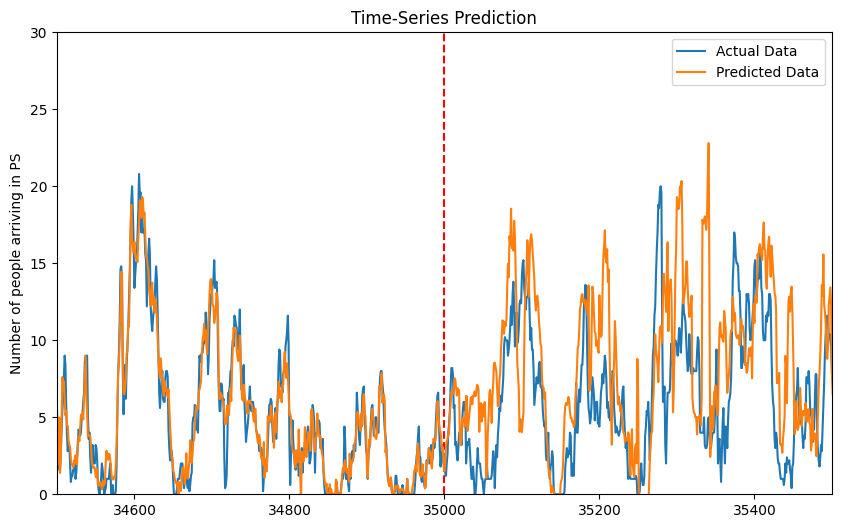

In [34]:


train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=35000, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actual Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.ylabel('Number of people arriving in PS')
plt.legend()


ax = plt.gca()
xmin = 34500  
xmax = 35500
ymin = 0
ymax = 30
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show() 

Now we can see just how hard it is to predict the future. At this point we could add parameters and layers to try to do better. I'll do that in predict6.ipynb